# Home Assignment No. 2: Part 2 (Theory)

In this part of the homework you are to solve several simple theoretical problems related to machine learning algorithms.
* For every separate problem you can get only 0 points or maximal points for this problem. There are **NO INTERMEDIATE scores**.
* Your solution must me **COMPLETE**, i.e. contain all required formulas/proofs/detailed explanations.
* You must write your solution for any problem right after the words **YOUR SOLUTION**. Attaching pictures of your handwriting is allowed, but **highly discouraged**.
## $\LaTeX$ in Jupyter
Jupyter has constantly improving $\LaTeX$ support. Below are the basic methods to
write **neat, tidy, and well typeset** equations in your notebooks:
* to write an **inline** equation use 
```markdown
$ you latex equation here $
```
* to write an equation, that is **displayed on a separate line** use 
```markdown
$$ you latex equation here $$
```
* to write a **block of equations** use 
```markdown
\begin{align}
    left-hand-side
        &= right-hand-side on line 1
        \\
        &= right-hand-side on line 2
        \\
        &= right-hand-side on the last line
\end{align}
```
The **ampersand** (`&`) aligns the equations horizontally and the **double backslash**
(`\\`) creates a new line.

# Task1. Bayesian methods (1 point)

For a dataset $D =(X,y) =\{(x_i,y_i)\}^m_{i=1}$, $x_i \in \mathbb{R}^d$, $y_i\in\mathbb{R}$ it is known,that 
$$y_i = w^T x_i + \epsilon$$
where $\epsilon \sim N(0,\sigma^2)$, $w  \sim N(0,\alpha I)$ . Suppose that $X^T X =I$, where $I$ is the identity matrix. Derive MAP estimation for $w$.

### Your solution

$$\begin{gather}
    w^* = \arg\max_w\log \big[p(y|w)p(w)\big]\\
    p(y|w) = \frac{1}{\sqrt{2\pi\sigma^2}}\prod_i\exp\left[
    -\frac{1}{2}\left(\frac{y_i - w^\top x_i}{\sigma}\right)^2\right]\\
    p(w) = \frac{1}{(2\pi\alpha^2)^{\frac{d}{2}}}\exp\left(-\frac{\|w\|^2}{2\alpha^2}\right)
\end{gather}$$

$$
    w^* = \arg\min_w\left[\frac{1}{2\sigma^2}\sum_i (y_i - w^\top x_i)^2
    + \frac{\|w\|^2}{2\alpha^2}\right]
$$

In the last expression, the terms independent of $w$ were omitted  
Rewrite the sum as inner product

$$
    w^* = \arg\min_w \left[\frac{1}{2\sigma^2}\|Y - Xw\|^2 + \frac{\|w\|^2}{2\alpha^2}\right]
$$

Zero gradient is necessary and sufficient optimum condition in the convex problem

$$\begin{gather}
    -\frac{1}{\sigma^2}X^\top(Y-Xw) + \frac{w}{\alpha^2} = 0\\
    X^\top Y = \left(X^\top X + \frac{\sigma^2}{\alpha^2}I\right)w
\end{gather}$$

$$
    \left(X^\top X + \frac{\sigma^2}{\alpha^2}I\right)^{-1}X^\top Y = w^*
$$

Given that $X^\top X$, we have

$$
   w^* = \frac{\alpha^2}{\alpha^2 + \sigma^2}X^\top Y
$$

# Task 2. Gaussian Processes 1 (1 point)

Let $\sigma_n(\mathbf{x}_*)$ be a predictive variance at point $\mathbf{x}_*$ of a Gaussian Process $f_n$ with zero mean and covariance $k(\cdot,\cdot)$ that was built using first $n$ training points.
Prove that for $\forall \mathbf{x}_*$ it holds
$$
    \sigma_{n}(\mathbf{x}_*) \leq \sigma_{n-1}(\mathbf{x}_*).
$$

### Your solution

### Maksim Velikanov's solution
From the lecture about GP we have the formula(p. 25):
$$
\sigma_n(x_*)^2 = k_{**} - \mathbf{k}_{*}^{(n) \, T} \left[\mathbf{K}^{(n)} + \sigma^2 I^{(n)}\right]^{-1}\mathbf{k}_*^{(n)}
$$
Since $k_{**}$ doesn't depend on $n$, we only need to show that
$$
\mathbf{k}_{*}^{(n) \, T} \left[\mathbf{K}^{(n)} + \sigma^2 I^{(n)}\right]^{-1}\mathbf{k}_*^{(n)} \geq \mathbf{k}_{*}^{(n-1) \, T} \left[\mathbf{K}^{(n-1)} + \sigma^2 I^{(n-1)}\right]^{-1}\mathbf{k}_*^{(n-1)}
$$
Now let's use matrix inversion formulas for block matrices, which were used in p. 24 of the lecture(implicitly). To prove the required inequality, we will choose blocks corresponding to the the first $n-1$ training points, and the $n$'th point. 
$$
\mathbf{k}_{*}^{(n)} = 
\begin{bmatrix}
\mathbf{k}_{*}^{(n-1)} \\
k_{*n}
\end{bmatrix}
$$

$$
\mathbf{K}^{(n)} + \sigma^2 I^{(n)} = 
\begin{bmatrix}
\mathbf{K}^{(n-1)} + \sigma^2 I^{(n-1)} & \mathbf{k}^{(n-1)}_n \\
\mathbf{k}^{(n-1) \, T}_n & k_{nn} + \sigma^2
\end{bmatrix}
$$
Now we use inversion formulas for this block matrix. For convinience let's denote $\left[\mathbf{K}^{(n)} + \sigma^2 I^{(n)}\right]^{-1} = \mathbf{A}^{(n)}$ and $1 \, / \, \left(k_{nn} - \mathbf{k}^{(n-1) \, T}_n \mathbf{A}^{(n-1)} \mathbf{k}^{(n-1)}_n\right) = S_n$
$$
\left[\mathbf{K}^{(n)} + \sigma^2 I^{(n)}\right]^{-1} \equiv \mathbf{A}^{(n)} = 
\begin{bmatrix}
\mathbf{A}^{(n-1)} + \mathbf{A}^{(n-1)}\mathbf{k}^{(n-1)}_n S_n \mathbf{k}^{(n-1) \, T}_n\mathbf{A}^{(n-1)} & -\mathbf{A}^{(n-1)}\mathbf{k}^{(n-1)}_n S_n \\
- S_n \mathbf{k}^{(n-1) \, T}_n\mathbf{A}^{(n-1)} & S_n
\end{bmatrix}
$$
Now let's substitute this result
$$
\begin{multline}
\mathbf{k}_{*}^{(n) \, T} \left[\mathbf{K}^{(n)} + \sigma^2 I^{(n)}\right]^{-1}\mathbf{k}_*^{(n)} = 
\begin{bmatrix}
\mathbf{k}_{*}^{(n-1)} \\
k_{*n}
\end{bmatrix} ^T
\begin{bmatrix}
\mathbf{A}^{(n-1)} + \mathbf{A}^{(n-1)}\mathbf{k}^{(n-1)}_n S_n \mathbf{k}^{(n-1) \, T}_n\mathbf{A}^{(n-1)} & -\mathbf{A}^{(n-1)}\mathbf{k}^{(n-1)}_n S_n \\
- S_n \mathbf{k}^{(n-1) \, T}_n\mathbf{A}^{(n-1)} & S_n
\end{bmatrix}
\begin{bmatrix}
\mathbf{k}_{*}^{(n-1)} \\
k_{*n}
\end{bmatrix} = \\
= \mathbf{k}_{*}^{(n-1) \, T} \left[\mathbf{K}^{(n-1)} + \sigma^2 I^{(n-1)}\right]^{-1}\mathbf{k}_*^{(n-1)} + S_n \left(  \mathbf{k}_{*}^{(n-1) \, T} \mathbf{A}^{(n-1)}\mathbf{k}^{(n-1)}_n \mathbf{k}^{(n-1) \, T}_n\mathbf{A}^{(n-1)} \mathbf{k}_{*}^{(n-1)} - \mathbf{k}_{*}^{(n-1) \, T} \mathbf{A}^{(n-1)}\mathbf{k}^{(n-1)}_n k_{*n} - k_{*n} \mathbf{k}^{(n-1) \, T}_n\mathbf{A}^{(n-1)} \mathbf{k}_{*}^{(n-1)}+ k_{*n} k_{*n}\right)
\end{multline}
$$
We note that $\mathbf{k}_{*}^{(n-1) \, T} \mathbf{A}^{(n-1)}\mathbf{k}^{(n-1)}_n$ is actually a scalar, and, due to simmetricity of $\mathbf{A}^{(n-1)}$, we have $\mathbf{k}_{*}^{(n-1) \, T} \mathbf{A}^{(n-1)}\mathbf{k}^{(n-1)}_n = \mathbf{k}^{(n-1) \, T}_n\mathbf{A}^{(n-1)} \mathbf{k}_{*}^{(n-1)}$. Using this we rewrite the last formula
$$
\mathbf{k}_{*}^{(n) \, T} \left[\mathbf{K}^{(n)} + \sigma^2 I^{(n)}\right]^{-1}\mathbf{k}_*^{(n)} = \mathbf{k}_{*}^{(n-1) \, T} \left[\mathbf{K}^{(n-1)} + \sigma^2 I^{(n-1)}\right]^{-1}\mathbf{k}_*^{(n-1)} + S_n \left( \mathbf{k}_{*}^{(n-1) \, T} \mathbf{A}^{(n-1)}\mathbf{k}^{(n-1)}_n - k_{*n}\right)^2
$$
Finally, we note that $S_n = \frac{\det\left[\mathbf{K}^{(n-1)} + \sigma^2 I^{(n-1)}\right]}{\det\left[\mathbf{K}^{(n)} + \sigma^2 I^{(n)} \right]} \geq 0$ as a ratio of determinants of positive definite matrices. Therefore
$$
\sigma_{n-1}(x_*)^2 - \sigma_n(x_*)^2 = S_n \left( \mathbf{k}_{*}^{(n-1) \, T} \mathbf{A}^{(n-1)}\mathbf{k}^{(n-1)}_n - k_{*n}\right)^2 \geq 0
$$

# Task 3. Gaussian Processes 2 (1 point)

Consider you have gaussian distribution on $\mathbb R$ with zero mean and differentiable by arguments covariation funtion $k(x, \tilde{x})$. Get an expression for the correlation between the implementation of a Gaussian process  $y(x) ∼ GP (0, k(x, x ^{\prime}))$ and its derivative $\frac{\partial y(\tilde x)}{\partial \tilde x}$ .

### Your solution

Zero mean GP:
$$\begin{gather}
    \qquad k(x,x') = \mathbb E\left[\big(y(x) - \mathbb E[y(x)]\big)
    \big( y(x') - \mathbb E[y(x')]\big)\right] = \mathbb E[y(x)y(x')]\\
    \sigma^2(x) = k(x,x) = \mathbb E[y^2(x)]
\end{gather}$$

By definition, correlation is:
$$
    \mathrm{corr}(y, \partial_{\tilde x} y) = \frac{
    \mathbb E[y\partial_{\tilde x} y] - \mathbb E[y]\mathbb E[\partial_{\tilde x} y]}
    {\sqrt{\mathbb E[y^2] - \mathbb E[y]^2}
    \sqrt{\mathbb E[(\partial_{\tilde x} y)^2] - \mathbb E[\partial_{\tilde x} y]^2}}
$$

Gaussian integral converges, hence we can swap differentiation and integration:

$$\begin{gather}
    \mathbb E[\partial_{\tilde x} y] = \partial_{\tilde x}\mathbb E[y] = 0\\
    \mathbb E[y(x)\partial_{\tilde x} y(\tilde x)]
    = \partial_{\tilde x}\mathbb E[y(x)y(\tilde x)] = \partial_{\tilde x}k(x,\tilde x)
\end{gather}$$

In the last equation we used independence of $y(x)$ from $\tilde x$

Represent square derivative as follows:
$$
    (\partial_{\tilde x} y)^2 = \partial_x y\;\big|_{x = \tilde x} \cdot\partial_{\tilde x} y
$$

Then,
$$
    \mathbb E[(\partial_{\tilde x}y)^2] = \partial_x\partial_{\tilde x } k(x,\tilde x)\;\big|_{x=\tilde x}
$$

Ultimately, we have:

$$
    \mathrm{corr}(x, x') = \frac{\partial_{x'}k(x,x')}{\sqrt{k(x,x)\cdot\partial_x\partial_{x'}k(x, x')\;\big|_{x=x'}}}
$$

# Task 4. Kernel theory (1 point)

Let $K(x, x'):\mathcal{X}\times \mathcal{X}\rightarrow \mathbb{R}$ be a PDS kernel,
and $\phi\colon \mathcal{X} \to \mathcal{H}$ its <b>unknown </b> feature mapping. For $x,x'\in\mathcal{X}$ derive the formula for the **distance** between $
\phi(x)$ and $\phi(x')$ in $\mathcal{H}$.
 

### Your solution

Since $K(x,x')$ is a p.d. kernel, iff $K(x,x') = \langle\phi(x),\phi(x')\rangle$.  
Here $\phi:\mathcal X\to\mathcal H$ is a mapping from original feature space to some Hilbert space.  

Define distance via inner product 
$d(x, x')\triangleq\langle\phi(x)-\phi(x'),\phi(x)-\phi(x')\rangle^\frac{1}{2}$

Then,
$$
    d(x,x') = \left(\langle\phi(x),\phi(x)\rangle
    - 2\langle\phi(x),\phi(x')\rangle
    + \langle\phi(x'),\phi(x')\rangle\right)^\frac{1}{2}
$$

And
$$
    d(x,x') = \sqrt{K(x,x) - 2K(x,x') + K(x',x')\rangle}
$$

# Task 5. Naive Gradient Boosting Regression (1 points)

You are given a regression dataset, consisting of 5 samples with 1-dimensional feature vector $X$ and scalar target vector $y \in \mathbb{R}$:

|  x   |  y   | 
|:----:|:----:| 
|  10  |  1   | 
|  32  |  9   | 
|  46  |  13  | 
|  54  |  16  | 
|  63  |  23  | 

In this task you are asked to implement **3 steps of Gradient Boosting Regression** with decision tree stumps as the learners $h_0, h_1, h_2$. 

In order to complete this task:
1. Refer to the slides on naive boosting for regression in **Lecture 8**.
2. Assume that the initial model $f_0$ is the mean of the target vector $y$
3. According to the algorithm on the boosting approach for regression from **1.**, compute the residuals
4. Manually, find a suitable split among the $x_i$ for each decision tree weak model $h_t(X)$, which minimizes the loss function:

$$L_{\text{split_i}} = \frac{\text{Var}_{left\_split}*N_{1} + \text{Var}_{right\_split}*N_{2}}{N_{1}+N_{2}}$$

where  $\text{Var}$ is the variance of the values contained in each leaf, $N_1$ is the number of target values $y$ in the left leaf, $N_{2}$ - in the right leaf

5. Perform the Gradient Boosting step on the ensemble model $f_t$ with the resulting decision tree stump predictions (assume that the learning rate $lr=1.0$).

**Note on Decision Tree Stumps:** A decision tree stump is a decision tree, which consists only of the root and its immediate leaves. In case of this task, at each iteration you are asked to consider 5 different variants of the decision tree stumps $h_t^i$ - one variant for each of the split candidates $x_i$. You should choose the variant that minimizes the loss written above. The two leaves of the tree are formed according to the rule:

```python
if x_i < split:
    target_value -> left leaf
elif x_i >= split:
    target_value -> right leaf
```
**HINT:** Think about what should be `target_value` equal to in case of Gradient Boosting Regression.

The prediction of decision tree stump $h_t(x_i)$ is the mean of the values of the according leaf.



**The task**:

* Fill in the table - round the values of table up to the second digit after decimal point:


|   x  |   y  |$f_0$|$$y - f_0$$|$L$|$h_0$|$f_1$|$$y-f_1$$|$L$|$h_1$|$f_2$|$$y - f_2$$|$L$|$h_2$|$F_3$|
|------|------|-----|-----------|---|-----|-----|---------|---|-----|-----|-----------|---|-----|-----|
|  10  |  1   |  0  |    0      | 0 |  0  |  0  |    0    | 0 |  0  |  0  |    0      | 0 |  0  |  0  | 
|  32  |  9   |  0  |    0      | 0 |  0  |  0  |    0    | 0 |  0  |  0  |    0      | 0 |  0  |  0  |
|  46  |  13  |  0  |    0      | 0 |  0  |  0  |    0    | 0 |  0  |  0  |    0      | 0 |  0  |  0  |
|  54  |  16  |  0  |    0      | 0 |  0  |  0  |    0    | 0 |  0  |  0  |    0      | 0 |  0  |  0  |
|  63  |  23  |  0  |    0      | 0 |  0  |  0  |    0    | 0 |  0  |  0  |    0      | 0 |  0  |  0  |


where $L$ is the loss, calculated by the formula for decision tree stumps above, for each of the 5 split variants of the decision tree stump at each iteration
* Write down the splits (the feature values) you have found for each of the tree stumps

* Insert the predictions of the full ensemble model and the split values, you have achieved after 3 iterations into the plotting cell below (**COPY AND PASTE** the last column from the table above and the splits list to the plotting cell below, instead of **#your solution**):

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from itertools import groupby
from statistics import mean, pvariance

In [17]:
def plot_tree(x,F,stumps):
    x_range = np.arange(np.min(x), np.max(x)+1)
    x_r = []
    f_r = []
    stmps = [0] + stumps + [np.inf]
    for st in range(1,len(stmps)):
        x_r.extend([list(group) for k, group in groupby(x_range, lambda x: x<stmps[st] and x>=stmps[st-1]) if k])
        f_r.append([f_i for f_i,x_ii in zip(F,x) if x_ii<stmps[st] and x_ii>=stmps[st-1]])
    F_to_plot = []
    for ft in range(len(f_r)):
        #assert len(f_r) == len(x_r)
        if len(f_r[ft]) == 1:
            F_to_plot.extend([f_r[ft][0]]*len(x_r[ft]))
        elif len(f_r[ft]) > 1:
            F_to_plot.extend([mean(f_r[ft])]*len(x_r[ft]))
    return x_range, F_to_plot

### Maksim Velikanov's Solution
(provide you here unchanged, author spelling saved)

---
Since i am afraid i may misunderstand the way i have to fill the table, this is how i understood it.
On t'th iteration:
* On $i$'th position of $L$ column i put the loss of $h_t$ if the split is chosen at $x_i$
* On $i$'th position of $h_t$ column i put the prediction of the learner $h_t$ with optimal split at point $x_i$
* For $y-f_t$ and $f_{t+1}$ columns i use optimized models from $t$'th and $(t+1)$'th iterations 

In [8]:
def my_var(data): #statistics.pvariance doesn't allow empty data
    if len(data) > 0:
        return pvariance(data)
    else:
        return 0
def my_mean(data): #statistics.mean doesn't allow empty data
    if len(data) > 0:
        return mean(data)
    else:
        return 0
def make_iteration(target, m):
    L = np.zeros(m)
    for i in range(m):
        L[i] = (my_var(target[:i]) * i + my_var(target[i:]) * (m-i)) / m
    i_opt = np.argmin(L)
    predictions = np.zeros(m)
    for i in range(m):
        if i < i_opt:
            predictions[i] = my_mean(target[:i_opt])
        else:
            predictions[i] = my_mean(target[i_opt:])
    return L, i_opt, predictions

In [9]:
#cell for first iteration
y = np.array([1, 9, 13, 16, 23])
f0 = y.mean() * np.ones(5)
res0 = y - f0
L0, i_opt_0, predictions0 = make_iteration(res0, 5)
f1 = f0 + predictions0
print(np.around(f0,decimals=2))
print(
    i_opt_0,np.around(res0,decimals=2),
    np.around(L0,decimals=2),
    np.around(predictions0,decimals=2), 
    np.around(f1,decimals=2), sep='\n')

[12.4 12.4 12.4 12.4 12.4]
2
[-11.4  -3.4   0.6   3.6  10.6]
[53.44 20.95 16.93 19.83 25.35]
[-7.4  -7.4   4.93  4.93  4.93]
[ 5.    5.   17.33 17.33 17.33]


In [10]:
#cell for second iteration
res1 = y - f1
L1, i_opt_1, predictions1 = make_iteration(res1, 5)
f2 = f1 + predictions1
print(
    i_opt_1,np.around(res1,decimals=2),
    np.around(L1,decimals=2),
    np.around(predictions1,decimals=2),
    np.around(f2,decimals=2), sep='\n')

4
[-4.    4.   -4.33 -1.33  5.67]
[16.93 12.93 16.93 13.8   8.91]
[-1.42 -1.42 -1.42 -1.42  5.67]
[ 3.58  3.58 15.92 15.92 23.  ]


In [11]:
#cell for third iteration
res2 = y - f2
L2, i_opt_2, predictions2 = make_iteration(res2, 5)
f3 = f2 + predictions2
print(
    i_opt_2,np.around(res2,decimals=2),
    np.around(L2,decimals=2),
    np.around(predictions2,decimals=2),
    np.around(f3,decimals=2), sep='\n')

1
[-2.58  5.42 -2.92  0.08  0.  ]
[8.91 7.24 7.57 8.9  8.91]
[-2.58  0.65  0.65  0.65  0.65]
[ 1.    4.23 16.56 16.56 23.65]


## PLOTTING CELL##

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 4.23, 4.23, 4.23, 4.23, 4.23, 4.23, 4.23, 4.23, 4.23, 4.23, 4.23, 4.23, 4.23, 4.23, 16.56, 16.56, 16.56, 16.56, 16.56, 16.56, 16.56, 16.56, 16.56, 16.56, 16.56, 16.56, 16.56, 16.56, 16.56, 16.56, 16.56, 23.65]


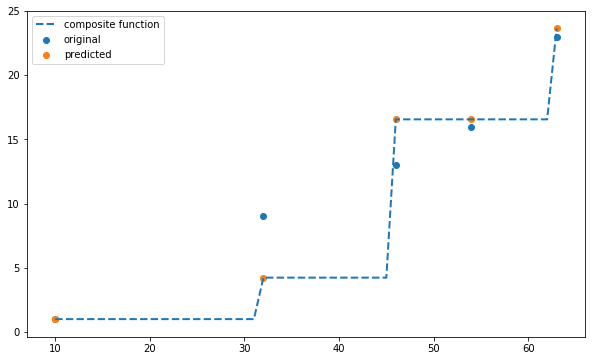

In [19]:
x = [10,32,46,54,63]
y = [1, 9, 13, 16, 23]

#note that the order of F(x_i) should be corresponding to the order of x_i in the table

############ INSERT YOUR SOLUTION HERE###############
F3 = [1., 4.23, 16.56, 16.56, 23.65]
splits = [46, 63, 32]

x_range, boosted_F_plot = plot_tree(
    x, F3, stumps = list(np.sort(splits)))
print(boosted_F_plot)
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.scatter(x,y, label = 'original')
ax.scatter(x, F3, label = 'predicted')
ax.plot(
    x_range,boosted_F_plot, '--',
    linewidth=2, label = 'composite function')
plt.legend()
plt.show()

# Task 6. AdaBoost (1 point)

For each of the following cases,explain how AdaBoost, as given in **Lecture 7**, will treat a weak hypothesis $h_t$ with weighted error $N_t(h_t , w_t )$. Also, in each case, explain why this behavior takes place.
1. $N_t = \frac{1}{2}$
2. $N_t > \frac{1}{2}$
3. $N_t = 0$

### Your solution

1. The error functional $\tilde R(f_{t+1}) = \tilde R(f_t)$ does not change. So, the algorithm is indifferent to adding a new classifier, since it does not improve the total loss anyhow. And $h_t$ won't be added. Especially, if the regularization term (on model complexity) is included.

2. Considering such estimator, AdaBoost will be able to decrease total error by maximizing $N_t$. So, $h_t$ will be added, which will lead to deterioration of the current results (worsen ensemble expressiveness)

3. This case is similar to the first one in the sense that the error functional does not change. But now $h_t$ is superior to what we have already ensembled. So, AdaBoost is better to take only $h_t$, since it outbids any other hypothesis.
